# Chapter 2: The Numerical Content

Here, we verify and explore in some additional details the content from Sections 2.2 through 2.4 in the text.

## Section 2.2: A Finite Difference Approximation

Starting with (2.14), we have that $A\in\mathbb{R}^{n\times n}$ is given by
$$
\large A = \left(
                \begin{array}{ccccc}
                    2 & -1 & 0 & \cdots & 0 \\
                    -1 & 2 & -1 & \ddots & \vdots \\
                    0 & \ddots & \ddots & \ddots & 0 \\
                    \vdots & \ddots & -1 & 2 & -1 \\
                    0 & \cdots & 0 & -1 & 2
                \end{array}
           \right)
$$
and the data vector is given by
$$
\large b = h^2\left(
                    \begin{array}{c} 
                        f(x_1) \\
                        f(x_2) \\
                        \vdots \\
                        f(x_n)
                    \end{array}
                \right).
$$

The $h^2$ comes from discretizing the differential operator with the centered finite difference scheme. 
It is perhaps slightly strange that we put this on the data vector instead of on $A$.
Later, in Section 2.3, we will see that $\frac{1}{h^2}A$ defines the difference operator $L_h$. 

The Gaussian elimination discussed in Section 2.2.3 should be familiar from undergraduate linear algebra.
If not, it is straightforward if not a bit messy (you may want to review this here https://en.wikipedia.org/wiki/Gaussian_elimination). 
The whole idea is to reduce the system of linear equations into row-echelon form (https://en.wikipedia.org/wiki/Row_echelon_form) and use back-substitution to then determine the vector $v$ such that $Av=b$. 

Since formally we can write $v=A^{-1}b$ (assuming $A^{-1}$ exists), it is perhaps natural to ask why we do not simply just construct the inverse of the matrix?
Because that is ***expensive*** in terms of FLOPS (https://en.wikipedia.org/wiki/FLOPS) and thanks to Gaussian elimination, completely unnecessary in determining $v$ with less FLOPS. 

While you could code up your own version of Gaussian elimination, or even just Algorithm 2.1 in the text, there are many available computational libraries that will do this for you efficiently. 
We show how using ``numpy.linalg.solve`` below on Example 2.5 from the text.

(5L, 5L)
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


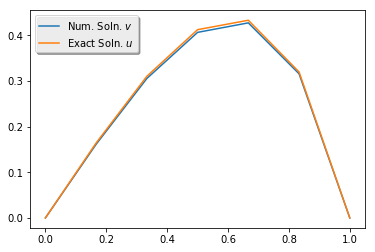

In [1]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

n = 5
A = np.zeros((n,n))
print A.shape

np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)
print A

x = np.linspace(0,1,n+2)
h = x[1]-x[0]
b = h**2 * (3*x+x**2)*np.exp(x)

v = np.zeros(n+2)
v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

u = x*(1-x)*np.exp(x) #Exact soln.

plt.figure(1)
plt.plot(x,v,label='Num. Soln. $v$')
plt.plot(x,u,label='Exact Soln. $u$')
plt.legend(loc='upper left', shadow=True)

In [2]:
n = [5, 10, 20, 40, 80]
E_h = np.zeros(5)
h = np.zeros(5)
alpha_h = np.zeros(5)

count = 0
print '   n    &    h     &      E_h     &   Rate of Conv. ' + r'\\ \hline'
for n in n:
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)
    
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    b = h[count]**2 * (3*x+x**2)*np.exp(x)

    v = np.zeros(n+2)
    v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

    u = x*(1-x)*np.exp(x) #Exact soln.
    
    E_h[count] = np.max(np.abs(u-v))
    
    if count == 0:
        print ' %3d    &   %.3f  & %.8f   &         ' % (n, h[count], E_h[count]) + r'   \\'
    else:
        alpha_h[count] = np.log(E_h[count]/E_h[count-1])/np.log(h[count]/h[count-1])
        print ' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], alpha_h[count]) + r'  \\'
    
    count +=1

   n    &    h     &      E_h     &   Rate of Conv. \\ \hline
   5    &   0.167  & 0.00588534   &            \\
  10    &   0.091  & 0.00178473   &   1.9685   \\
  20    &   0.048  & 0.00049105   &   1.9957   \\
  40    &   0.024  & 0.00012883   &   1.9999   \\
  80    &   0.012  & 0.00003302   &   1.9996   \\


## Section 2.3: Continuous and Discrete Solutions

Let's define a funciton for computing the discrete inner product for functions in $D_h$ like in (2.29)

In [3]:
def inner_h(u,v,h):
    z = h * (u[0]*v[0] + u[-1]*v[-1])/2.0 + h*np.dot(u[1:-1],v[1:-1])
    return z

### Exercise 2.20:

Prove that if $u,v\in C_0^2((0,1))$ then 
$$
\large    \left| \left< u, v \right> -  \left< u, v \right>_h \right| \leq \frac{h^2}{12} \left|\left| (uv)'' \right|\right|_\infty
$$

In the proof below, we use the well established error bound associated with the Trapezoidal rule (e.g., see 

***Proof:***

Let $u,v\in C_0^2((0,1))$. 
Then, $uv\in C_0^2((0,1))$. 
Let $f=uv$. 
Then, $\int_0^1 f(x)\, dx = \left<u,v\right>$ and $\left<u,v\right>_h$ is identified as the trapezoidal rule applied to this integral.
The result follows immediately from the established error bound for the trapezoidal rule. $\Box$

***Some extra material***

If you've never seen the proof of the error bound for the trapezoidal rule, it follows from applying the integration-by-parts formula choice with some creative choices of integration constants.
I will sketch out the process as a two-step process below.

(1) Lemma: For $f\in C^2((0,1))$, let $x_i\in[0,1]$ and $h>0$ sufficiently small so that $x_i+h\in[0,1]$
$$
\large \left|\int_{x_i}^{x_i+h} f(x)\, dx - \frac{h}{2}(f(x_i+h)-f(x_i)) \right| \leq \frac{h^3}{12}\left|\left|  f''\right|\right|_\infty.
$$

Sketch of Proof: A simple change of variables (to simplify the limits of integration) followed by integrating-by-parts twice with clever choices of integration constants leads to
$$
 \large    \int_{x_i}^{x_i+h} f(x)\, dx = \int_0^h f(t+x_i)\, dt = \underbrace{\frac{h}{2}\left[f(x_i) + f(x_i+h)\right]}_{\text{Trap. Rule}} + \underbrace{\int_{0}^{h} \left(\frac{(t-h/2)^2}{2}-\frac{h^2}{8} \right)f''(t+x_i)\, dt}_{\text{Error in Trap. Rule on $(x_i, x_i+h)$}}.
$$
So it follows that the error can be bounded by
$$
 \large \left| \int_{0}^{h} \left(\frac{(t-h/2)^2}{2}-\frac{h^2}{8} \right)f''(t+x_i)\, dt \right| \leq \left|\left|f''\right|\right|_\infty \int_0^h \left| \frac{(t-h/2)^2}{2}-\frac{h^2}{8} \right| \, dt. 
$$
The integrand is the absolute value of a parabola $\frac{(t-h/2)^2}{2}-\frac{h^2}{8}$ which opens upward and is zero whenever $t-h/2 = \pm h/2$ (i.e., at $t=0$ and at $t=h$), so for $t\in(0,h)$, we have that
$$
   \large \left|\frac{(t-h/2)^2}{2}-\frac{h^2}{8}\right| = \frac{h^2}{8} - \frac{(t-h/2)^2}{2}. 
$$
It follows from a direct integration that the error in the trapezoidal rule on $(x_i,x_i+h)$ is bounded by
$$
 \large \left| \int_{0}^{h} \left(\frac{(t-h/2)^2}{2}-\frac{h^2}{8} \right)f''(t+x_i)\, dt \right| \leq \frac{h^3}{12}\left|\left|f''\right|\right|_\infty.
$$

(2) Since we apply the trapezoidal rule on $n$ subintervals, we add up the error bound $n$ times and use the fact that $h=1/n$ to get the result used in the proof of Exercise 2.20 above.

### Lemma 2.3 and 2.4: Symmetric Positive Defeniteness of the operator $L_h$

The book provides one way of proving this. 
Here's another.

For $u\in D_{h,0}$, we observe that $L_h u$ is simply given by $\frac{1}{h^2} A\tilde{u}$ where $\tilde{u}$ is the vector defined by evaluating $u$ at $x_i$ for $i=1,\ldots, n$ and the matrix $A$ is as given above.
Moreover, for $u,v\in D_{h,0}$ we also have that $\left<u,v\right>_h$ simplifies to $h(\tilde{u},\tilde{v})$ where $(\cdot,\cdot)$ denotes the usual Euclidean inner product.
Now, with this notation, and the fact that $A$ is a SPD matrix, the SPD of the operator $L_h$ follows immediately. 

### A maximum principle for the discrete problem

One take home message is that the discrete analog of the dirac delta function is given by $\frac{1}{h} e^k$ where $e^k\in D_{h,0}$ is defined by $e^k(x_k)=1$ and $e^k(x_j)=0$ if $j\neq k$.
Implicit is the assumption that we also require that $1\leq k\leq n$, i.e., that we evaluate at an interior point since $e^k\in D_{h,0}$ automatically implies that $e^k(x_0)=0=e^k(x_{n+1})$).

Another take home message is that the discrete Green's function is given by $G^k(x_j) = G(x_j,x_k)$ where $G$ is the Green's function for the continuous problem so that $L_h G^k = \frac{1}{h}e^k$. 

Let's explore this a bit numerically.

In [4]:
def G(x,y): 
    if 0 <= y <= x:
        z = y*(1-x)
    else:
        z = x*(1-y)
    return z

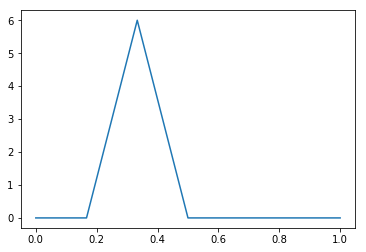

In [5]:
n = 5

x = np.linspace(0,1,n+2)
h = x[1]-x[0] #So 1/h = n+1

G_k = np.zeros((n+2,n+2))
for j in range(0,n+2):
    x_j = x[j]
    for k in range(0,n+2):
        x_k = x[k]
        G_k[j,k] = G(x_j,x_k)
        

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)

# Choose an integer between 0 and n+1
k = 2

test = np.zeros(n+2)
test[1:-1] = 1/h**2 * np.dot(A,G_k[1:-1,k])

plt.plot(x,test)   

With the inner product notation, we have for the continuous problem $u(x) = \left< G(x,y),f(y) \right>$ (where the integral is with respect to $y$ not $x$), and now for the discrete problem we also have that $v(x_j) = \left< G^k(x_j), f \right>_h$ (where the summation is with repect to $k$ not $j$).
This implies another way for construction solutions using (2.33). 

This explore this numerically.

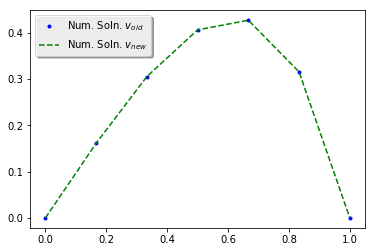

In [6]:
# Another way to construct solutions using (2.33)

b_old = h**2 * (3*x+x**2)*np.exp(x)

v_old = np.zeros(n+2)
v_old[1:-1] = np.linalg.solve(A, b_old[1:-1]) #Numerical soln. using Gaussian elimination

b_new = (3*x+x**2)*np.exp(x)

v_new = np.zeros(n+2)
for j in range(1,n+1):
    v_new[j] += inner_h(G_k[j,:],b_new,h)

u = x*(1-x)*np.exp(x) #Exact soln.

plt.figure(1)
plt.plot(x,v_old,'b.',label='Num. Soln. $v_{old}$')
plt.plot(x,v_new,'g--',label='Num. Soln. $v_{new}$')
plt.legend(loc='upper left', shadow=True)

Let's make sure Proposition 2.6 holds for our numerically constructed discrete Green's functions.

In [7]:
n = range(1,30)

for n in n:
    x = np.linspace(0,1,n+2)
    h = x[1]-x[0] #So 1/h = n+1

    G_k = np.zeros((n+2,n+2))
    for j in range(0,n+2):
        x_j = x[j]
        for k in range(0,n+2):
            x_k = x[k]
            G_k[j,k] = G(x_j,x_k)
    
    temp = np.zeros(n+2)
    for i in range(0,n+2):
        temp[i] = inner_h(G_k[:,i], np.ones(n+2), h)
        
    print np.max(temp)

0.125
0.111111111111
0.125
0.12
0.125
0.122448979592
0.125
0.123456790123
0.125
0.123966942149
0.125
0.12426035503
0.125
0.124444444444
0.125
0.124567474048
0.125
0.124653739612
0.125
0.124716553288
0.125
0.124763705104
0.125
0.1248
0.125
0.124828532236
0.125
0.12485136742
0.125


### A word of caution about discrete Green's functions.

If we know $G$ for the continuous problem, then it appears as if determining the discrete Green's function is rather trivial and we can use it to easily determine solutions through simple computations of inner products.

Formally, we think of $G$ as the inverse of the differential operator $L$ applied to $\delta(x-y)$, and we can think of the discrete Green's function in a similar way as the inverse of $L_h$ applied to $e^k$. This simply means that the discrete Green's funciton may be constructed by determining $\frac{1}{h^2}A^{-1}$ and then multipling this to the standard basis vectors (scaled by $1/h$) of $\mathbb{R}^n$. 

However, this is a ***stupid*** computation because it involves inverting a matrix, which is really expensive and something we try to avoid whenever possible. 

Just like with regular Green's functions, which are really difficult to determine in general cases, the mere existence of one is usually enough to infer useful properties of the solution similar to how the existence of the inverse of a matrix is also useful even if we never construct it.

## Section 2.4: Eigenvalue Problems

Let's verify Lemma 2.9 numerically.

Look at plots of the numerically constructed eigenfunctions and their errors due to numerical approximation. 
What does this tell you about using numerical spectral methods like that in (2.47) that are not sufficiently truncated?

In [ ]:
n = 30
x = np.linspace(0,1,n+2)
h = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)

mu, v = np.linalg.eigh(1/h**2 * A) #eigh returns eigs of symmetric matrix in increasing order

# Use Lemma 2.9
mu_k = np.zeros(n)
for k in range(0,n):
    mu_k[k] = 4/(h**2) * (np.sin((k+1)*np.pi*h/2))**2

print mu
print 
print np.max(np.abs(mu-mu_k))

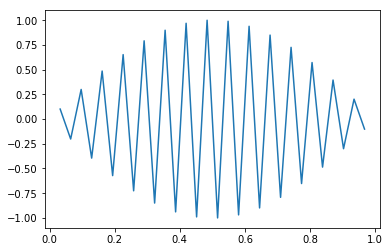

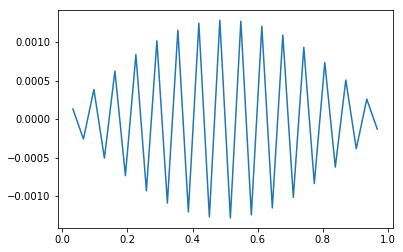

In [11]:
# Pick k between 1 and 30
k = 30
plt.figure(1)
# Note that the eig functions in numpy will normalize eigenvectors with respect to the usual 2-norm and the sign is arbitrary
ind = np.argmax(np.abs(v[:,k-1]))
plt.plot(x[1:-1],v[:,k-1]/v[ind,k-1])

plt.figure(2)
plt.plot(x[1:-1],v[:,k-1]/v[ind,k-1]-np.sin(k*np.pi*x[1:-1]))